In [1]:
import numpy as np
from sdm_ml.dataset import BBSDataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sparse_gp.kernels.rbf_kernel import RBFKernel
from sparse_gp.likelihoods.bernoulli_logit_likelihood import BernoulliLogitLikelihood
from sparse_gp.inference.laplace_inference import LaplaceInference

In [2]:
csv_folder = '../../../multi_species/bbs/dataset/csv_bird_data/'
dataset = BBSDataset(csv_folder)

In [3]:
training_set = dataset.get_training_set()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

covariates_full = training_set['covariates'].values
outcomes = training_set['outcomes'][['American Crow', 'Brown-headed Cowbird']]

scaler = StandardScaler()

covariates = scaler.fit_transform(covariates_full.astype(np.float32)[:400, :])
outcomes = outcomes.values[:400, 0].astype(float)

In [5]:
kernel = RBFKernel(np.arange(covariates.shape[1]))

In [6]:
likelihood = BernoulliLogitLikelihood()

In [7]:
inference = LaplaceInference(kernel, likelihood, verbose=True)

In [8]:
inference.fit(covariates, outcomes)

Log marginal likelihood: -164.28
Gradient square norm: 39.37
Log marginal likelihood: -164.28
Gradient square norm: 39.37
Log marginal likelihood: -144.89
Gradient square norm: 9.68
Log marginal likelihood: -136.78
Gradient square norm: 1.95
Log marginal likelihood: -134.98
Gradient square norm: 1.34
Log marginal likelihood: -138.86
Gradient square norm: 11.80
Log marginal likelihood: -134.74
Gradient square norm: 0.70
Log marginal likelihood: -134.42
Gradient square norm: 0.42
Log marginal likelihood: -134.58
Gradient square norm: 1.97
Log marginal likelihood: -134.39
Gradient square norm: 0.31
Log marginal likelihood: -134.36
Gradient square norm: 0.25
Log marginal likelihood: -134.41
Gradient square norm: 0.59
Log marginal likelihood: -134.36
Gradient square norm: 0.11
Log marginal likelihood: -134.35
Gradient square norm: 0.21
Log marginal likelihood: -134.35
Gradient square norm: 0.15
Log marginal likelihood: -134.35
Gradient square norm: 0.10
Log marginal likelihood: -134.34
Grad

     fun: 134.3099763952889
     jac: array([ 3.12625947e-03,  1.13230124e-03,  1.91473542e-05, -4.96750204e-03,
       -3.14025179e-03,  1.04875696e-03, -4.86823219e-03,  4.31190818e-03,
       -1.77462936e-03])
 message: 'Optimization terminated successfully.'
    nfev: 43
     nit: 28
    njev: 43
  status: 0
 success: True
       x: array([1.66776079, 1.35602134, 1.53153324, 3.0783388 , 1.55353477,
       2.1354124 , 5.56627288, 1.59035287, 3.88450651])

In [9]:
print(inference.kernel)

RBF Kernel with lengthscales [1.67 1.36 1.53 3.08 1.55 2.14 5.57 1.59] and stdev 3.88.


In [10]:
inference.kernel.stdev

3.8845065123239646

In [11]:
# Predict the test set
test_set = dataset.get_test_set()
test_covariates = scaler.transform(test_set['covariates'])
test_outcomes = test_set['outcomes']['American Crow'].values

In [12]:
to_predict = test_covariates

to_predict.shape

(1157, 8)

In [13]:
means, vars = inference.predict(to_predict)
means.shape, vars.shape

((1157,), (1157,))

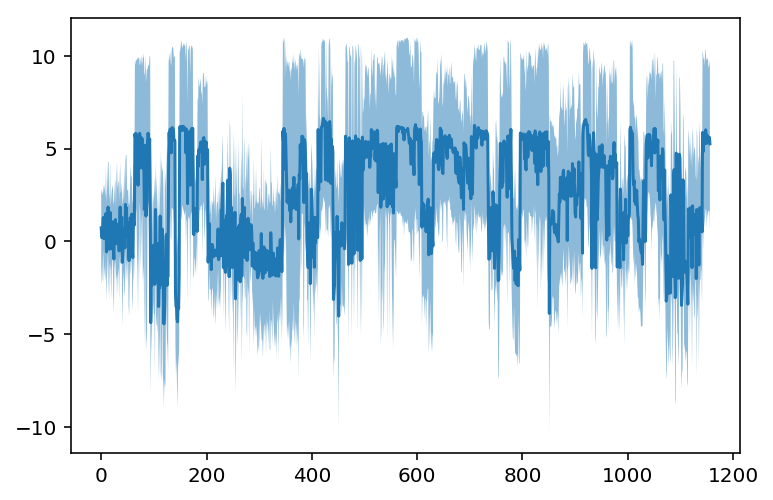

In [14]:
plt.plot(means)
plt.fill_between(np.arange(means.shape[0]), means - 2*np.sqrt(vars), means + 2*np.sqrt(vars), alpha=0.5)

In [15]:
from scipy.special import expit
samples = np.random.multivariate_normal(mean=means, cov=np.diag(vars), size=1000)
mean_probs = expit(samples).mean(axis=0)

In [16]:
from sklearn.metrics import log_loss

In [17]:
log_loss(test_outcomes, mean_probs)

0.3219023721838176

In [18]:
# 0.227 in my other. So not perfect, but not terrible, either.